In [1]:
import pandas as pd

filepath = "C:\\Users\\orndo\\OneDrive\\Desktop\\VSCode\\SToPA\\data\\2019_parsed_logs_2022_12_01.csv"
df = pd.read_csv(filepath)
df3 = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12298 entries, 0 to 12297
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        12298 non-null  int64 
 1   date              12298 non-null  object
 2   change_idx        12298 non-null  int64 
 3   log_num           12298 non-null  object
 4   pdf_page          12298 non-null  int64 
 5   call_datetime     10599 non-null  object
 6   disp_datetime     2217 non-null   object
 7   enrt_datetime     1602 non-null   object
 8   arvd_datetime     7927 non-null   object
 9   clrd_datetime     9011 non-null   object
 10  call_reason       12298 non-null  object
 11  call_type         12298 non-null  object
 12  call_action       12298 non-null  object
 13  call_taker        12298 non-null  object
 14  responding_units  10323 non-null  object
 15  street            12298 non-null  object
 16  narrative         12289 non-null  object
dtypes: int64(3),

In [2]:
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag


custom_stop_words = {'checked', 'check', 'done', 'area', 'north', 'south', 'west', 'east'}
stop_words = set(stopwords.words('english')).union(custom_stop_words)


# Function to remove unneccesary text from narrative
def clean_narrative(text):

    text = str(text)

    try:
        # Remove Narrative:
        pattern = r"\bNarrative:"
        modified_text = re.sub(pattern, '', text).lower()

        # Stopword removal (NEEDS TO BE IMPROVED, MAYBE SHOULD ONLY KEEP ADJECTIVES)
        word_tokens = word_tokenize(modified_text)
        filtered_tokens = [word.lower() for word in word_tokens if word.isalpha() and len(word) > 3 and word.lower() not in stop_words]

        return filtered_tokens
    
    except:

        return ' '

df['narrative'] = df['narrative'].apply(clean_narrative)

print(df['narrative'])

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
12293      [services, rendered, phone, parking, complaint]
12294    [vehicie, parking, curve, states, states, addr...
12295    [league, reports, doors, green, shed, little, ...
12296                                                   []
12297                                                   []
Name: narrative, Length: 12298, dtype: object


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import math

def getTokenList(user_select, pos):

    if user_select.upper() == 'Y':
        call_taker = input("Input officer name: ").upper()
        filtered_df = df[df['call_taker'] == call_taker]
        resulting_list = token_list(filtered_df)
        filtered_tokens = [value for value in resulting_list if not (isinstance(value, float) and math.isnan(value))]
        
        if pos.upper() == "Y":
            pos = input("Select POS: ADJ = 'JJ', Noun = 'NN', Verb = 'VB'").upper()
            filtered_tokens = pos_filter(filtered_tokens, pos)
    else:
        resulting_list = token_list(df)
        filtered_tokens = [value for value in resulting_list if not (isinstance(value, float) and math.isnan(value))]
        
        if pos.upper() == "Y":
            pos = input("Select POS: ADJ = 'JJ', Noun = 'NN', Verb = 'VB'").upper()
            filtered_tokens = pos_filter(filtered_tokens, pos)

    return filtered_tokens

def token_list(df):
    df_exploded = df.explode('narrative')
    return df_exploded['narrative'].tolist()

def pos_filter(tokens, pos):

    pos_tags = pos_tag(tokens)

    while True:
        try:
            if pos == 'JJ':
                filtered_tokens = [word.lower() for word, pos in pos_tags if pos.startswith('JJ')]
            elif pos == 'NN':
                filtered_tokens = [word.lower() for word, pos in pos_tags if pos.startswith('NN')]
            elif pos == 'VB':
                filtered_tokens = [word.lower() for word, pos in pos_tags if pos.startswith('VB')]

            return filtered_tokens
        
        except:
            continue

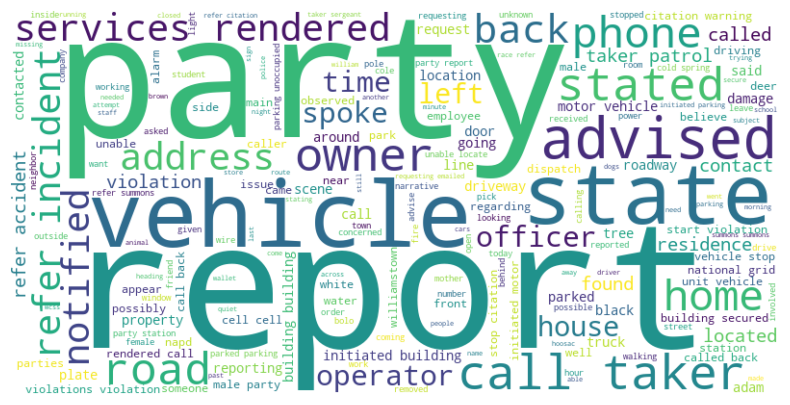

In [4]:
user_select = input("See specific officer? (Y/N)")
pos = input("Focus on a specific POS? (Y/N)")

tokens = getTokenList(user_select, pos)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()  